In [129]:
#Import Time, Datetime, MatPlotLib, Seaborn, Pandas, Numpy
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [130]:
#For visualizing the data, I will use Seaborn instead of MatPlotLib - because Seaborn requires less code.

#Here are some key questions I'm trying to answer with this analysis:

#1. What was 'typical' travel like each month in 2019 and 2020?  
        #This is the story of the change in Travel (see NPR re: percent change).

#2. What were the COVID stats in 2020 for those same date ranges?  
        #this is the story of COVID trends in those same date ranges.

#3. What was the correlation between COVID status in early (March/April), mid(May -July), 
    #and late (Aug - Oct) 'first wave' of COVID and TSA travel in 2020?
    #(I'm expecting a close correlation in early period, less correlation in mid/late period)

#Note: the longer term plan is to continue to follow the trend through the end of 2020, 
         #as the COVID second wave plays out this Fall/Winter.
    
###WHAT is my one big take-away?  The one big thing to focus on now?  It can be different later (I can grow my tree).#####

In [131]:
#Import the COVID DataFrame created and saved as .csv in the 'COVID19Travel_Create_DataFrames' notebook

covid_travel = pd.read_csv('covid_travel.csv')

#I've intentionally saved the COVID DataFrame as a .csv and opened it here
    #because I need it to have a standard index, rather than having the dates as the index
    #this is because the dates need to be their own column in order to include them in the charts

In [132]:
#Preview the DataFrame

covid_travel.tail(25)

,Unnamed: 0,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
174,2020-08-22,27995,288,1086,625822.0,2039233.0
175,2020-08-23,17040,199,824,841806.0,2493162.0
176,2020-08-24,49949,794,2562,726788.0,2358007.0
177,2020-08-25,21681,234,996,523186.0,2015088.0
178,2020-08-26,29289,460,1463,540043.0,2188688.0
179,2020-08-27,39368,571,1752,721060.0,2561109.0
180,2020-08-28,22425,221,877,738873.0,2658558.0
181,2020-08-29,18227,175,727,591734.0,1954902.0
182,2020-08-30,17680,174,636,807695.0,1887845.0
183,2020-08-31,27595,306,1348,711178.0,2278159.0


In [133]:
#Check the datatypes
covid_travel.info()

#The dates column can be renamed and the values re-converted to date datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          199 non-null    object 
 1   Cases                               199 non-null    int64  
 2   Deaths                              199 non-null    int64  
 3   Hospitalizations                    199 non-null    int64  
 4   2020 Traveler Count                 199 non-null    float64
 5   2019 Traveler Count (Same Weekday)  199 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [134]:
#Rename the dates column, from 'Unnamed'

covid_df = covid_travel.rename(columns = {"Unnamed: 0": "Date"})
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [135]:
#Import the datetime module
import datetime

#Convert the dates in the date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#Check the datatype for each column - the Date column is now datetime
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                199 non-null    datetime64[ns]
 1   Cases                               199 non-null    int64         
 2   Deaths                              199 non-null    int64         
 3   Hospitalizations                    199 non-null    int64         
 4   2020 Traveler Count                 199 non-null    float64       
 5   2019 Traveler Count (Same Weekday)  199 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 9.5 KB


In [136]:
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [137]:
#I anticipate that I'll want to create some bins to summarize the data by month 
    #But, datetime data-types cannot be binned with pd.cut()
    #Create a month index (number of the month) for each date first and use that for the bins

#Create a month index for each date and list as a separate column
covid_df["Month_Index"] = pd.DatetimeIndex(covid_df["Date"]).month
 
#Create bins using pd.cut() on the new "Month" column and append them to the DataFrame
month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
month_labels = ["Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec", "Jan"]
covid_df["Month"] = pd.cut(covid_df["Month_Index"], month_bins, labels=month_labels)

covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month
0,2020-03-01,233,12,71,2280522.0,2301439.0,3,Mar
1,2020-03-02,161,14,46,2089641.0,2257920.0,3,Mar
2,2020-03-03,224,11,59,1736393.0,1979558.0,3,Mar
3,2020-03-04,217,15,67,1877401.0,2143619.0,3,Mar
4,2020-03-05,253,9,73,2130015.0,2402692.0,3,Mar


In [145]:
#And finally, I'll need to pivot the data so that I can plot it 

#Use the pd.melt() method to pivot the traveler counts so that they can be called from the same column
tsa_plots = pd.melt(covid_df, id_vars=['Date'], value_vars=['2020 Traveler Count', '2019 Traveler Count (Same Weekday)'], var_name='Travelers', value_name='Counts')
tsa_plots

,Date,Travelers,Counts
0,2020-03-01,2020 Traveler Count,2280522.0
1,2020-03-02,2020 Traveler Count,2089641.0
2,2020-03-03,2020 Traveler Count,1736393.0
3,2020-03-04,2020 Traveler Count,1877401.0
4,2020-03-05,2020 Traveler Count,2130015.0
...,...,...,...
393,2020-09-11,2019 Traveler Count (Same Weekday),2484025.0
394,2020-09-12,2019 Traveler Count (Same Weekday),1879822.0
395,2020-09-13,2019 Traveler Count (Same Weekday),2485134.0
396,2020-09-14,2019 Traveler Count (Same Weekday),2405832.0


In [140]:
#Use the pd.melt() method to pivot the covid counts so that they can be called from the same column
covid_plots = pd.melt(covid_df, id_vars=['Month'], value_vars=['Cases', 'Deaths', 'Hospitalizations'], var_name='COVID Metrics', value_name='Counts')
covid_plots


,Month,COVID Metrics,Counts
0,Mar,Cases,233
1,Mar,Cases,161
2,Mar,Cases,224
3,Mar,Cases,217
4,Mar,Cases,253
...,...,...,...
592,Sept,Hospitalizations,812
593,Sept,Hospitalizations,574
594,Sept,Hospitalizations,560
595,Sept,Hospitalizations,1031


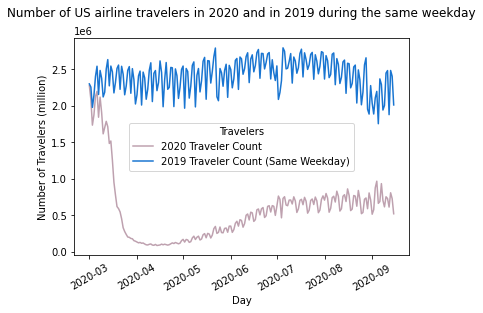

In [163]:
#Question 1: What did 2019 and 2020 Airline Travel count look like?

#Display the trend with a lineplot, set line colors using hex codes
hue_colors = {"2020 Traveler Count": "#bea1af", "2019 Traveler Count (Same Weekday)": "#1975d1"}
g = sns.lineplot(x="Date", y="Counts", hue="Travelers", data=tsa_plots, palette=hue_colors)
plt.ylabel("Number of Travelers (million)")
plt.xlabel("Day")
plt.xticks(rotation=30)
g.set_title("Number of US airline travelers in 2020 and in 2019 during the same weekday", y=1.07)
plt.show()

#Observations: 
    #As expected, 2019 traveler numbers were much higher than in 2020. They were fairly consistent across the year.
    #2020 traveler numbers dropped dramatically in mid-March and then slowly and steadily rose through the year
    #However, 2020 traveler numbers remained far lower than 2019 numbers

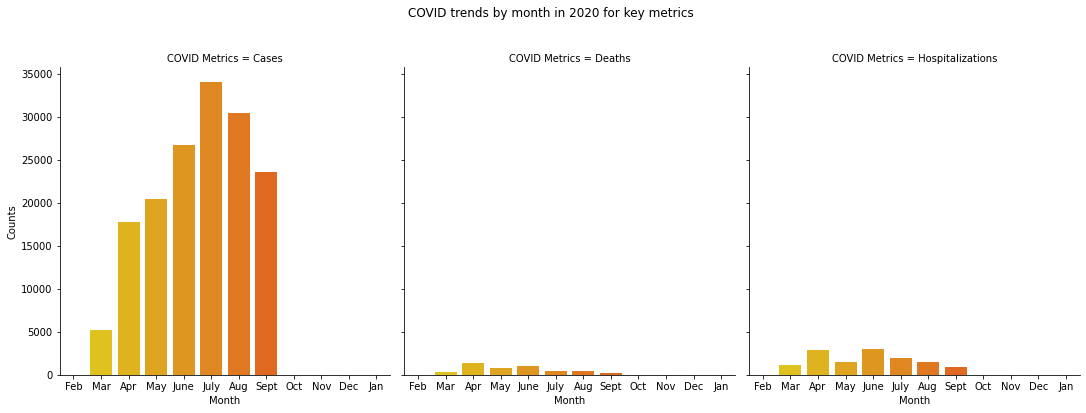

In [167]:
#Question 2: What were the COVID trends in 2020 for those same date ranges?

#Create a histogram with subplots to visualize this detail
g = sns.catplot(x="Month", y="Counts", col="COVID Metrics", data=covid_plots, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID trends by month in 2020 for key metrics", y=1.10)
plt.show()

#Observations: 
    #Number of cases rose sharply from March to peak in July and then decreased each month
    #Number of deaths was highest in April with June slightly behind; these numbers were lowest in March and Sept
    #Number of hospitalizations was highest in April and June also.  From June to Sept they decreased each month

In [174]:
#Question 3: What was the correlation between COVID stats in the early, mid, and late stages of the first wave of COVID in 2020?
    #Early period = March - April (first cases and US lockdown) 
    #Middle period = May - July (re-opening the US was heavily debated, safety measures designed, and much protesting occurred about racial injustice and demands for re-opening)
    #Late period = Aug - Oct (ending of the first wave, safety measures are in place, back to school began, cold and flu season has not yet begun)
    #my prediction is that there will be a close correlation in early period, less correlation in mid/late period
    
    #Travel didn't spike and drop in comparison with COVID cases
    
#Create bins to label each period and use pd.cut() on the "Month_Index" column and append them to the DataFrame
period_bins = [1, 5, 8, 11]
period_labels = ["Early First Wave", "Middle First Wave", "Late First Wave"]
                 
covid_df["Wave"] = pd.cut(covid_df["Month_Index"], period_bins, labels=period_labels)

covid_df.head()    

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month,Wave
0,2020-03-01,233,12,71,2280522.0,2301439.0,3,Mar,Early First Wave
1,2020-03-02,161,14,46,2089641.0,2257920.0,3,Mar,Early First Wave
2,2020-03-03,224,11,59,1736393.0,1979558.0,3,Mar,Early First Wave
3,2020-03-04,217,15,67,1877401.0,2143619.0,3,Mar,Early First Wave
4,2020-03-05,253,9,73,2130015.0,2402692.0,3,Mar,Early First Wave


In [179]:
##NEXT STEP 1: CREATE THE VISUALIZATON DOCUMENTED ABOVE####

#These are two different sets of plot code - one for a line graph and one for a bar graph.  Neither produces the result I want and I'll keep working on this.

#Display the trend with a lineplot, set line colors using hex codes
#g = sns.lineplot(x="Cases", y="2020 Traveler Count", hue="Month", data=covid_df, palette="Blues")
#plt.ylabel("Number of Travelers (million)")
#plt.xlabel("Day")
#plt.xticks(rotation=30)
#g.set_title("COVID Case Numbers Compared with Travel", y=1.07)
#plt.show()


#g = sns.catplot(x="Cases", y="2020 Traveler Count", hue="Month", data=covid_df, kind="bar", palette="autumn_r", ci=None)
#g.fig.suptitle("COVID Case Numbers Compared with Travel", y=1.10)
#plt.show()

#hue = months
#y = number of travelers (millions)
#x = number of cases (thousands)


In [ ]:
##NEXT STEP 2: LEARN AND USE MARKDOWN TO CHANGE KEY NOTES IN THE NOTEBOOKS####

In [ ]:
###NEXT STEP 3: Future Analysis: calculate the percent of drop in 2020 travelers per month and focus on how much of a drop there was in travelers due to COVID
    #in what way did travel change?  in what month?  which months had the most impact and by how much?